#project-1 : text - imge

In [ ]:
#!pip install diffusers --upgrade

In [ ]:
#!pip install invisible_watermark transformers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:00


In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "dog is sitting wearing black specs "

images = pipe(prompt=prompt).images[0]


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
!pip install gradio

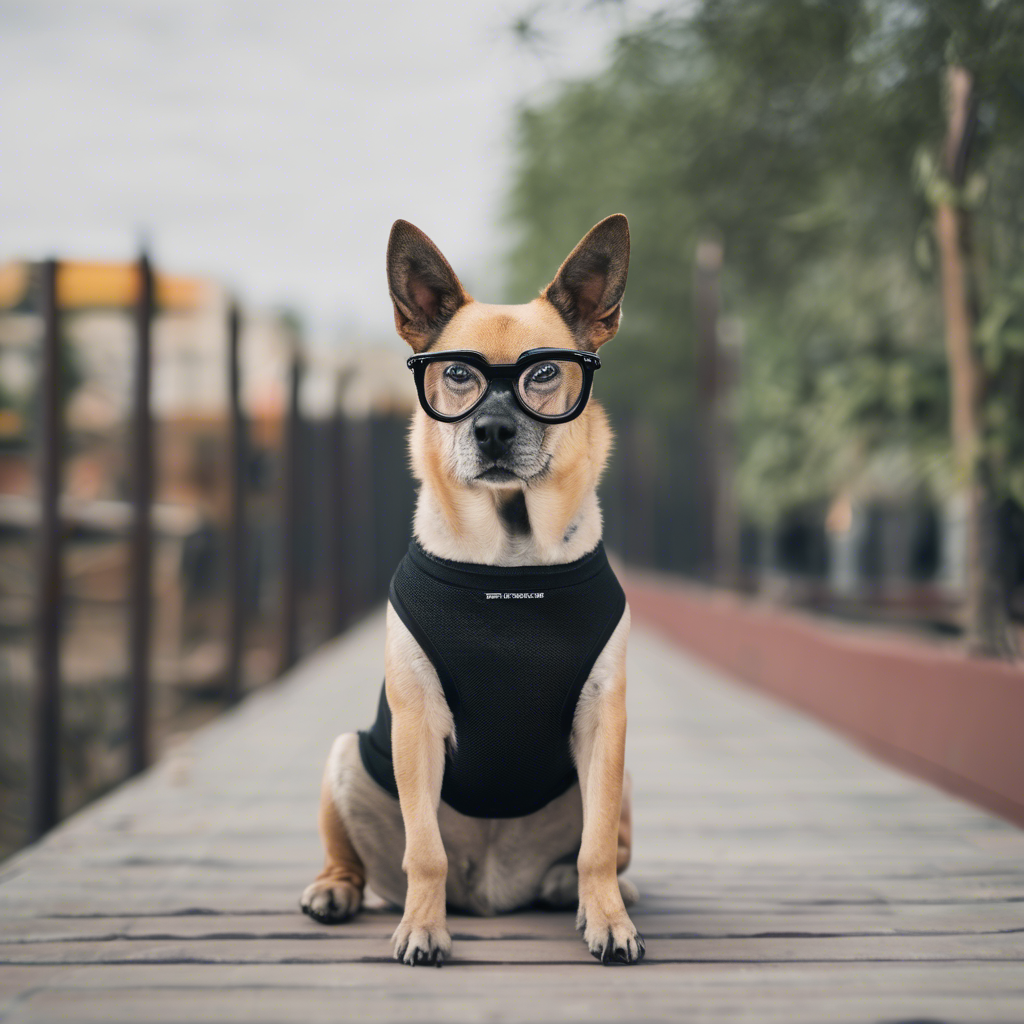

In [ ]:
images

In [ ]:
import gradio as gr
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "stabilityai/stable-diffusion-xl-base-1.0"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

def generated_image(prompt):
    image = pipe(prompt).images[0]
    return image

gr.Interface(
    fn=generated_image,
    inputs=gr.Textbox(label="Enter your prompt"),
    outputs=gr.Image(type="pil"),
    title="Stable Diffusion 2.1 - IMAGE GENERATOR APP",
    description="Enter text prompt and see the generated image"
).launch()

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.safetens(…):   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://30819afe6115acc7b7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!nvidia-smi

Fri Nov 14 05:45:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             35W /   70W |    7236MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----


#Project-2 : Text Prompt to Audio generation


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
#!pip install torchsde

In [ ]:
import torch
import soundfile as sf
from diffusers import StableAudioPipeline

pipe = StableAudioPipeline.from_pretrained("stabilityai/stable-audio-open-1.0", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# define the prompts
#prompt = "The sound of a hammer hitting a wooden surface."
prompt = " baby smiling with louder noise"
negative_prompt = "Low quality."

# set the seed for generator
generator = torch.Generator("cuda").manual_seed(0)

# run the generation
audio = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=200,
    audio_end_in_s=10.0,
    num_waveforms_per_prompt=3,
    generator=generator,
).audios

output = audio[0].T.float().cpu().numpy()
sf.write("baby smiling with louder noise.wav", output, pipe.vae.sampling_rate)


model_index.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

tokenizer/spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.85G [00:00<?, ?B/s]

projection_model/diffusion_pytorch_model(…):   0%|          | 0.00/1.59M [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/391 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

transformer/diffusion_pytorch_model.safe(…):   0%|          | 0.00/4.23G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/624M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

ImportError: 
CosineDPMSolverMultistepScheduler requires the torchsde library but it was not found in your environment. You can install it with pip: `pip install torchsde`


In [ ]:
!nvidia-smi

Fri Nov 14 06:09:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P0             29W /   70W |    5760MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# 3rd project --

In [ ]:
!pip install svgpathtools

In [ ]:
!pip install cairosvg

In [ ]:
!pip install omegaconf

In [ ]:
!pip install --upgrade pip
!pip install starvector

In [ ]:
!pip install git+https://github.com/username/starvector.git

In [ ]:
from PIL import Image
from svgpathtools import svgstr2paths
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoProcessor
from starvector.data.util import process_and_rasterize_svg
import torch

model_name = "starvector/starvector-8b-im2svg"

starvector = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, trust_remote_code=True)
processor = starvector.model.processor
tokenizer = starvector.model.svg_transformer.tokenizer

starvector.cuda()
starvector.eval()

image_pil = Image.open('assets/examples/sample-18.png')

image = processor(image_pil, return_tensors="pt")['pixel_values'].cuda()
if not image.shape[0] == 1:
    image = image.squeeze(0)
batch = {"image": image}

raw_svg = starvector.generate_im2svg(batch, max_length=4000)[0]
svg, raster_image = process_and_rasterize_svg(raw_svg)


#**WAN** AI ( NEW SOTA MODEL)

In [ ]:
import torch
from diffusers import AutoencoderKLWan, WanPipeline
from diffusers.utils import export_to_video

# Available models: Wan-AI/Wan2.1-T2V-14B-Diffusers, Wan-AI/Wan2.1-T2V-1.3B-Diffusers
model_id = "Wan-AI/Wan2.1-T2V-1.3B-Diffusers"
vae = AutoencoderKLWan.from_pretrained(model_id, subfolder="vae", torch_dtype=torch.float32)
pipe = WanPipeline.from_pretrained(model_id, vae=vae, torch_dtype=torch.bfloat16)
pipe.to("cuda")

prompt = "A horse walks on the grass, realistic"
negative_prompt = "Bright tones, overexposed, static, blurred details, subtitles, style, works, paintings, images, static, overall gray, worst quality, low quality, JPEG compression residue, ugly, incomplete, extra fingers, poorly drawn hands, poorly drawn faces, deformed, disfigured, misshapen limbs, fused fingers, still picture, messy background, three legs, many people in the background, walking backwards"

output = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    height=480,
    width=832,
    num_frames=81,
    guidance_scale=5.0
).frames[0]
export_to_video(output, "output.mp4", fps=15)


config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/508M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

text_encoder/model-00002-of-00005.safete(…):   0%|          | 0.00/4.90G [00:00<?, ?B/s]

text_encoder/model-00004-of-00005.safete(…):   0%|          | 0.00/5.00G [00:00<?, ?B/s]

text_encoder/model-00003-of-00005.safete(…):   0%|          | 0.00/4.97G [00:00<?, ?B/s]

text_encoder/model-00001-of-00005.safete(…):   0%|          | 0.00/4.97G [00:00<?, ?B/s]

text_encoder/model-00005-of-00005.safete(…):   0%|          | 0.00/2.89G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/751 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/854 [00:00<?, ?B/s]

tokenizer/spiece.model:   0%|          | 0.00/4.55M [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/16.8M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/677M [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/5.00G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json: 0.00B [00:00, ?B/s]

KeyboardInterrupt: 